In [1]:
#Loading in libraries
pacman::p_load(tidyverse, dplyr, ggplot2,  ggthemes, RColorBrewer, fastDummies, janitor, MLmetrics,
               repr, BBmisc, devtools, reticulate, Rcpp, tictoc, data.table, corrplot, ggrepel, cvAUC, e1071, resample)


#Loading in train data
df_train <- read.csv("../input/tabular-playground-series-apr-2022/train.csv")
train_labels <- read.csv("../input/tabular-playground-series-apr-2022/train_labels.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


resample installed



**Loading in h2o4gpu package**

In [2]:
reticulate::py_discover_config("h2o4gpu")
reticulate::conda_version(conda = "auto")

python:         /miniconda/envs/r-reticulate/bin/python
libpython:      /miniconda/envs/r-reticulate/lib/libpython3.7m.so
pythonhome:     /miniconda/envs/r-reticulate:/miniconda/envs/r-reticulate
version:        3.7.11 (default, Jul 27 2021, 14:32:16)  [GCC 7.5.0]
numpy:          /miniconda/envs/r-reticulate/lib/python3.7/site-packages/numpy
numpy_version:  1.18.5
h2o4gpu:        [NOT FOUND]

python versions found: 
 /miniconda/envs/r-reticulate/bin/python
 /usr/bin/python3
 /usr/bin/python

[1] "conda 4.10.3"

In [3]:
#Loading in h2o4gpu package
devtools::install_github("h2oai/h2o4gpu", subdir = "src/interface_r")

library(h2o4gpu)

#Installing python module for h2o4gpu
py_install("h2o4gpu",
          pip = TRUE)


'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/cub /tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/../../cub

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/xgboost /tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/../../xgboost

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/py3nvml /tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/../../py3nvml

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/scikit-learn.git /tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/../../scikit-learn

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/google/googletest.git /tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/../../tests/googletest

'/usr/bin/git' clone --depth 1 --no-hardl

rprojroot  (2.0.2 -> 2.0.3  ) [CRAN]
Rcpp       (1.0.7 -> 1.0.8.3) [CRAN]
withr      (2.4.2 -> 2.5.0  ) [CRAN]
jsonlite   (1.7.2 -> 1.8.0  ) [CRAN]
reticulate (1.22  -> 1.24   ) [CRAN]
magrittr   (2.0.1 -> 2.0.3  ) [CRAN]


Installing 6 packages: rprojroot, Rcpp, withr, jsonlite, reticulate, magrittr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘jsonlite’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘magrittr’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpLsZ7Tq/remotes1e7e06adcc/h2oai-h2o4gpu-aaf7795/src/interface_r/DESCRIPTION’ (427ms)
─  preparing ‘h2o4gpu’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘h2o4gpu_0.3.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘h2o4gpu’


The following object is masked from ‘package:base’:

    transform




# How does it look?

**Pie maker function**

In [4]:
pie_maker <- function(df, names) {

#Piechart
df_pie <- data.frame(c(as.numeric(prop.table(table(df[, length(df)])))), unique(df[, length(df)]))
    colnames(df_pie) <- names

df_pie[, length(df_pie)] <- as.factor(df_pie[, length(df_pie)])

#Label positions
df_pie <- df_pie %>% 
  arrange(desc(df_pie[, length(df_pie)])) %>%
  mutate(prop = df_pie[, length(df_pie)-1] / sum(df_pie[, length(df_pie)-1]) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop)

df_pie <- df_pie %>%
cbind(roundup = round(df_pie$prop, digits = 3))



options(repr.plot.width = 12, repr.plot.height = 7)
# Basic piechart
ggplot(df_pie, aes(x =" ", y = prop, fill = df_pie[, 2])) +
  geom_bar(stat = "identity", width = 2, color = "white") +
  coord_polar("y", start = 0) +
  theme_void() + 
  geom_label_repel(data = df_pie,
                   aes(y = ypos, label = paste0(roundup, "%")),
                   size = 7.5, nudge_x = 1.75, show.legend = FALSE) +
 scale_fill_manual(values = c(brewer.pal(n = 8, name = 'Pastel1'), brewer.pal(n = 7, name = 'Pastel2')), name = names[2]) +
 theme(legend.key.size = unit(1, 'cm'), 
        legend.key.height = unit(1, 'cm'), 
        legend.key.width = unit(1, 'cm'), 
        legend.title = element_text(size = 14), 
        legend.text = element_text(size = 11))
}

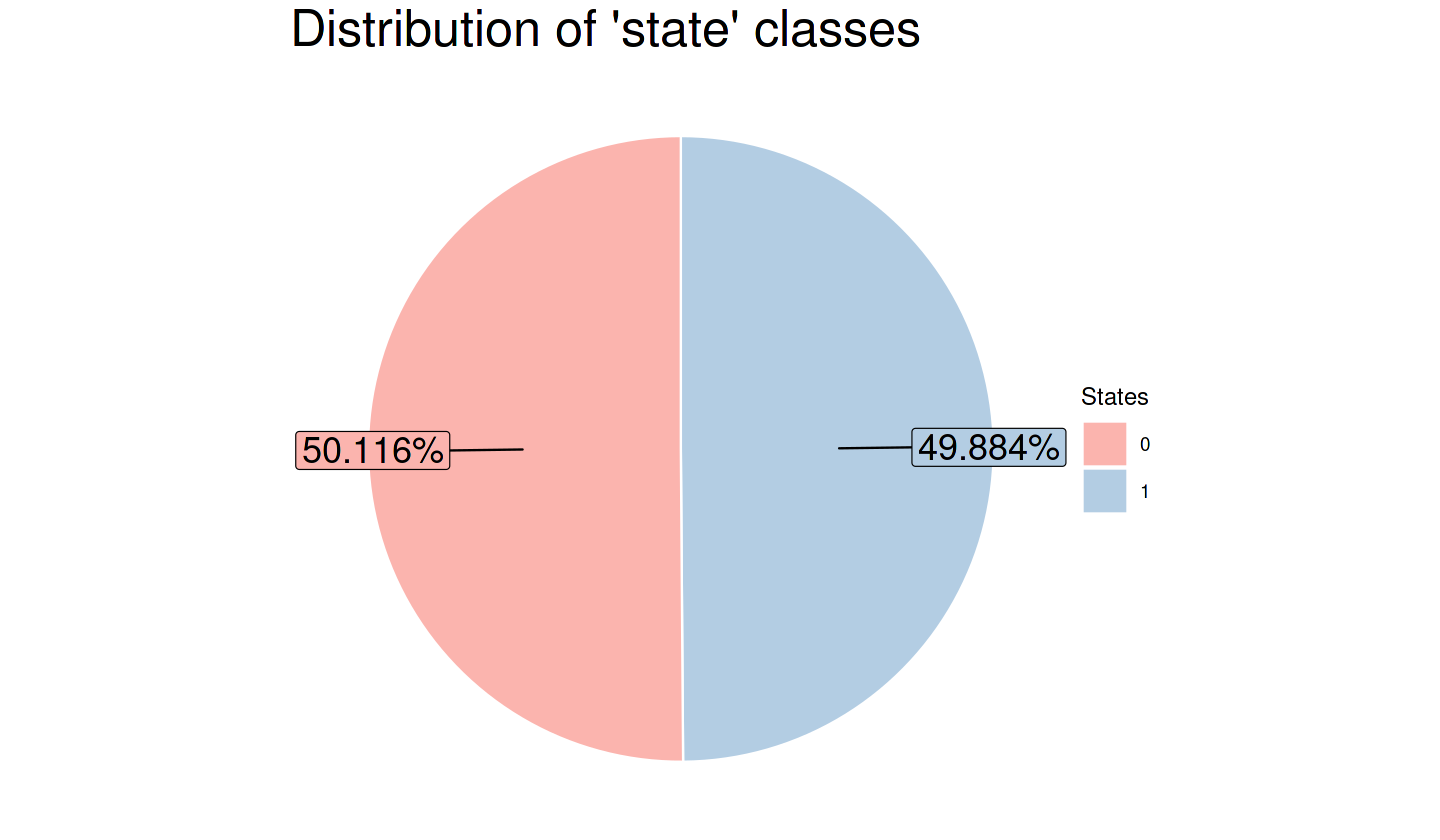

In [5]:
pie_maker(train_labels, c("State", "States")) + ggtitle("Distribution of 'state' classes") + theme(plot.title = element_text(size = 30))

In [6]:
#Joining train labels
df_train <- df_train %>%
    left_join(train_labels, by = 'sequence')

Normalizing sensors grouped by sequence yields better results than general normalization.

In [7]:
#Normalizing columns grouped by sequence
df_train <- df_train %>%
    group_by(sequence) %>%
    mutate_at(c(4:5,7:16), BBmisc::normalize, method = 'range', range = c(0,1)) %>%
    ungroup()

**Function for cleaning and creating dummy columns**

In [8]:
dummy_cols_cleaner <- function(df, which_col) {

only_1_remove <- length(df)

for(i in which_col) {
dummy_start <- length(df) + 1

    

#Saving the column name
character_name <- colnames(df)[i]

#Making dummy cols
    df <- df %>%
    mutate(dummy_cols(df[, i]))


#Fixing colnames
colnames(df)[dummy_start:length(df)] <- str_replace(colnames(df)[dummy_start:length(df)], ".data_", as.character(character_name))

}


#Removing column(s) that got one-hot encoded
df <- df[, -which_col]

if(length(which_col) == 1)
    df <- df[, -only_1_remove]
    
return(df)
}

**Function for creating statistics (mean / median / others)**

In [9]:
#df - data frame, stat - function e.g. mean / median, step_based - TRUE / FALSE - for plotting purposes
#state_group = TRUE / FALSE - whether to group based on states
create_stats <- function(df, stat, which_col, step_based = NULL, state_group = NULL) {
group_names <- 'by_sequence'

grouped_vars <- c('sequence')    

if(!missing(step_based) && step_based == TRUE)
    grouped_vars <- c('step')    



if(!missing(state_group) && state_group == TRUE){
    grouped_vars <- append(grouped_vars, 'state')
    group_names <- c('by_state')
}
    
#Applying chosen function over grouped columns
    df <- df %>%
        group_by_at(vars(all_of(grouped_vars))) %>%
        mutate_at(.vars = which_col, .funs = list(temp = ~stat(., ))) %>%
        ungroup()
    
#Fixing column names
    colnames(df)[(length(df)-length(which_col)+1):length(df)] <- paste(colnames(df)[(length(df)-length(which_col)+1):length(df)],
                                                                    group_names, sep = '_')
    colnames(df)[(length(df)-length(which_col)+1):length(df)] <- str_replace(string = colnames(df)[(length(df)-length(which_col)+1):length(df)],
                                                                           pattern = 'temp',
                                                                           replacement = as.character(substitute(stat)))

    return(df)
}

**Plotting sensors**

A quick look at how sensors look throughout the steps - overall and grouped by their state.
This may give some insight into the classification of states.

In [10]:
#Transforming variables into factors
df_sensors <- df_train %>%
    mutate(across(c(1:3, 17), as.factor))

df_sensors_ungrouped <- create_stats(df_sensors, stat = mean, c(4:16), step_based = TRUE, state_group = FALSE)
df_sensors_grouped <- create_stats(df_sensors, stat = mean, c(4:16), step_based = TRUE, state_group = TRUE)

**Facet plotter function**

In [11]:
facet_plotter <- function(df, grouped = NULL) {

plot_width <- 22
plot_title <- sub("\\_.*", "", str_sub(colnames(df)[20], 11))
    

#Changing plot width based on the 'grouped' argument
if(!missing(grouped) && grouped == TRUE)
plot_width <- 24



#Removing original sensor variables 
df <- df %>%
    dplyr::select(-c(4:16))
    
    

#Pivoting to longer format  
df <- pivot_longer(df, cols = c(5:17), names_to = "sensors")

    

df <- df %>%
    mutate(sensors = as.factor(sensors)) %>%
    group_by(step, sensors)

#Extracting unique values
df <- df %>%
    distinct(value, .keep_all = TRUE)

df$step <- as.numeric(df$step)    

#Changing the opacity of grid lines - 4th value is the 'alpha'
grid_alpha<- rgb(235, 235, 235, 190, maxColorValue = 255)


#Creating the plot
options(repr.plot.width = plot_width, repr.plot.height = 46)
sensors_plot <- ggplot(df, aes(x = step, y = value,
                                   color = sensors,  group = sensors)) +
    geom_line(size = 1.75) + theme_gdocs()  +
    theme(panel.grid.major = element_line(color = grid_alpha),
          panel.spacing.y = unit(2, "lines"), legend.title = element_text(size = 17),
          legend.text = element_text(size = 15), axis.title.x = element_text(size = 15),
          axis.text.x  = element_text(size = 15), axis.title.y = element_text(size = 15),
          axis.text.y  = element_text(size = 15), plot.title = element_text(size = 24, face = "bold.italic")
          ) + scale_x_continuous(breaks = seq(from = 0, to = 59, by = 5))


if(!missing(grouped) && grouped == TRUE)
print(sensors_plot + facet_grid(sensors ~ state, scales = "free", space = "free_x") + ggtitle(paste(c("Sensor values"), plot_title, c("by group"))))

else if(missing(grouped) || grouped == FALSE)
print(sensors_plot + facet_grid(sensors ~., scales = "free_y") + ggtitle(paste(c("Sensor values"), plot_title)))
                

}

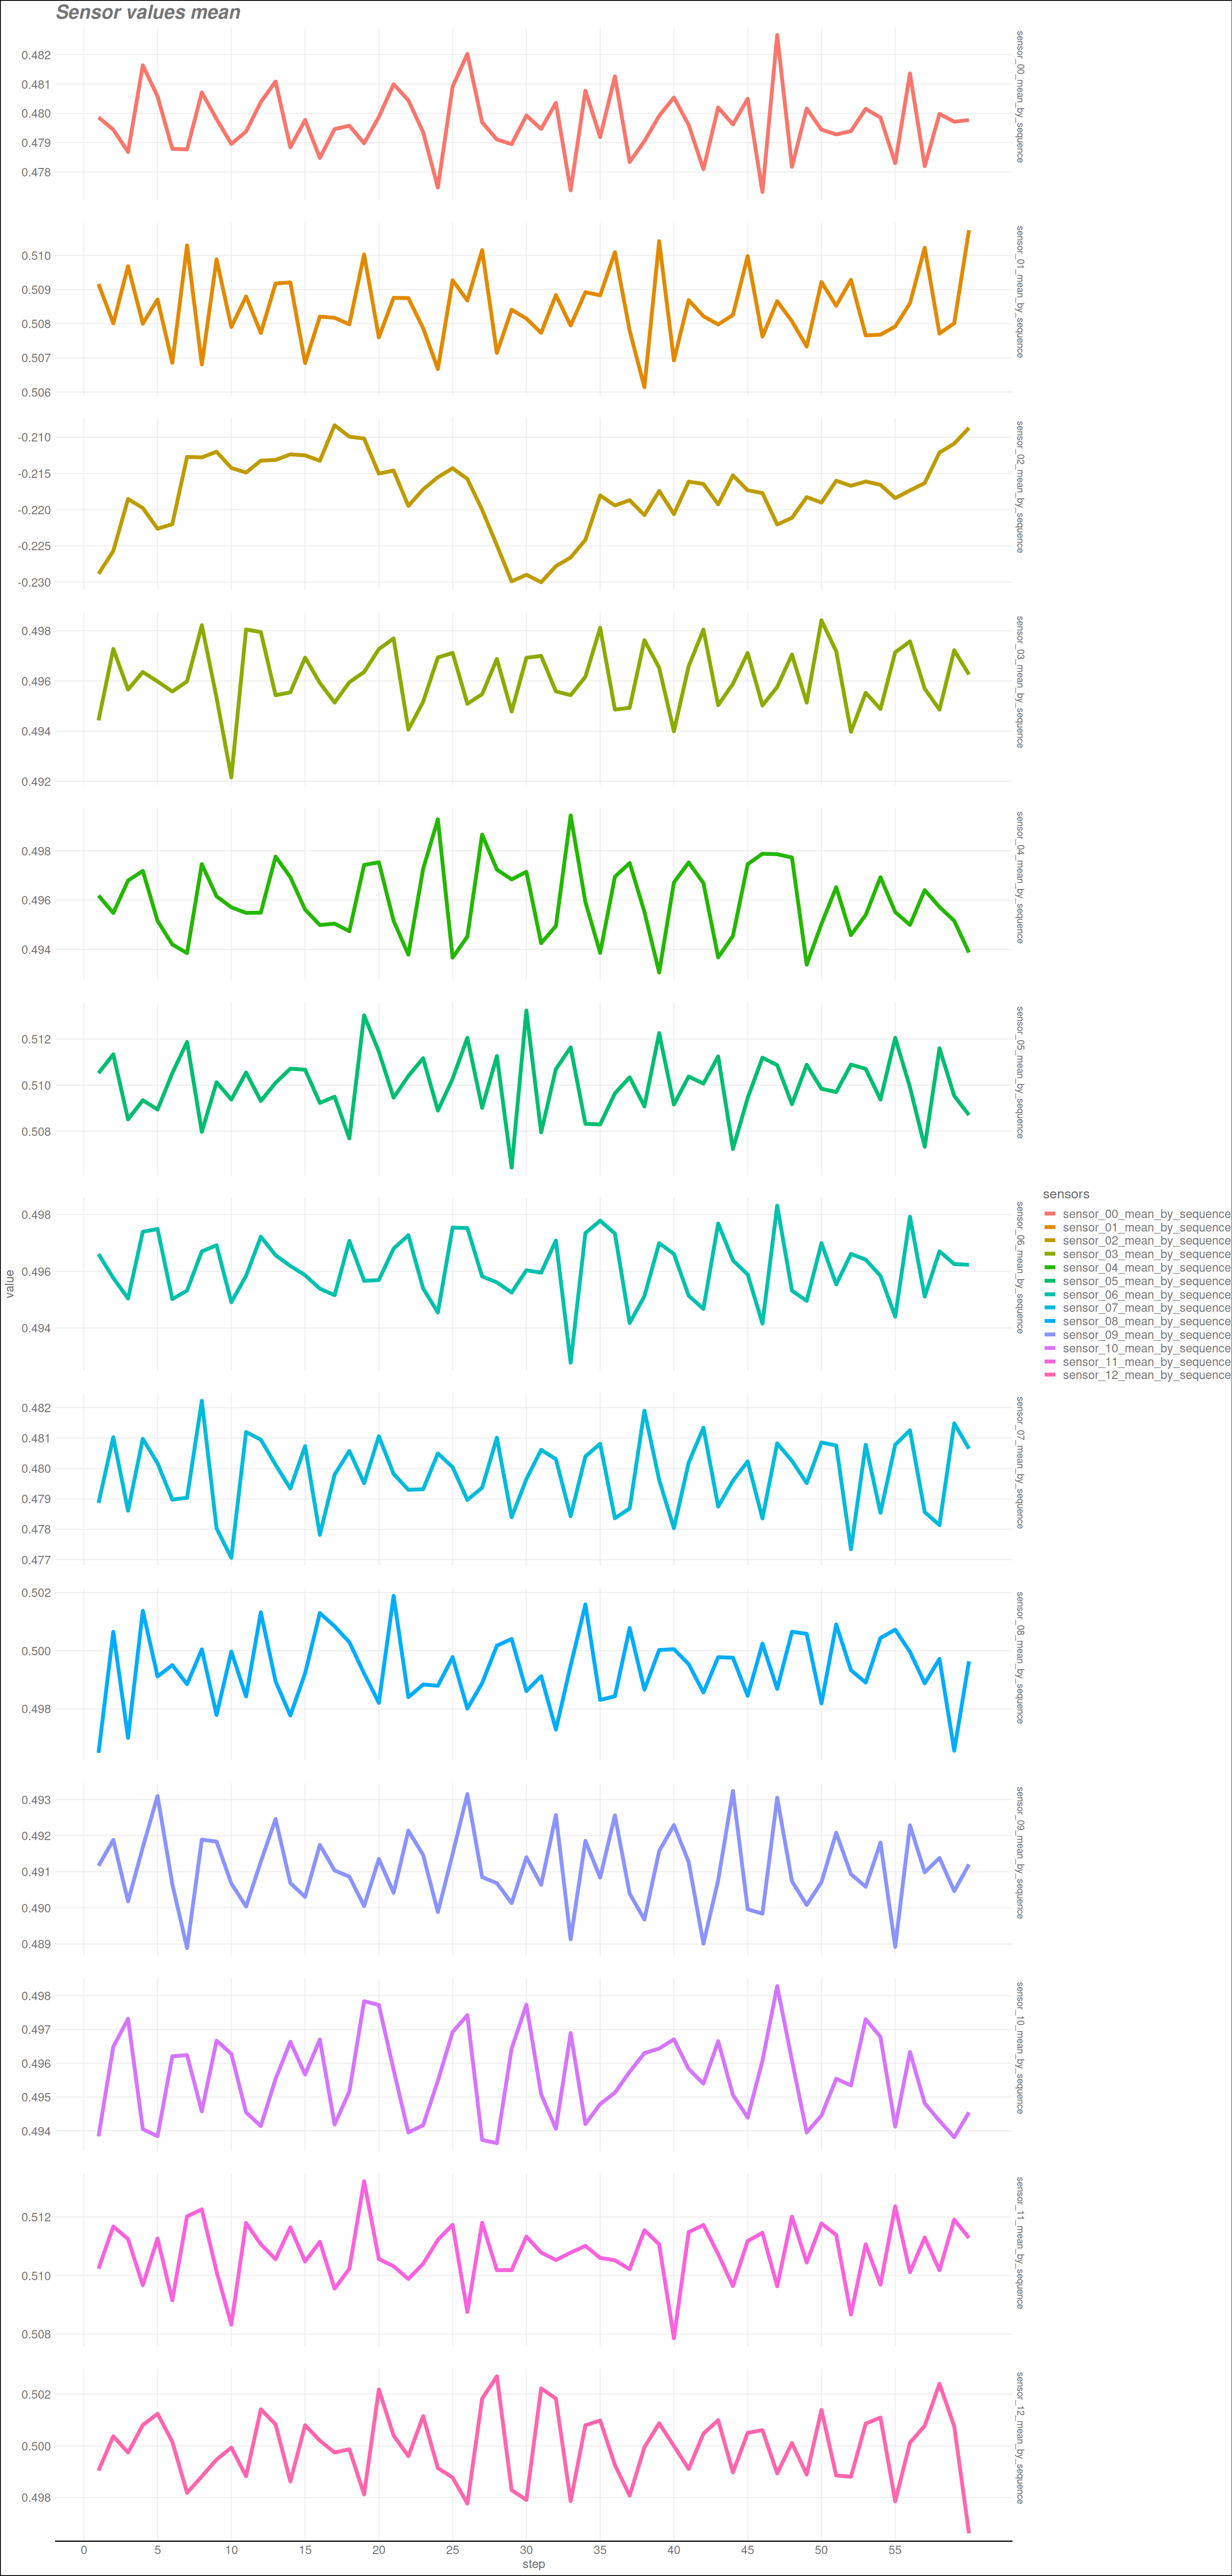

used     (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells  3127246 167.1   5875680   313.8   5875680  313.8
Vcells 33836303 258.2 226761454  1730.1 279641765 2133.5

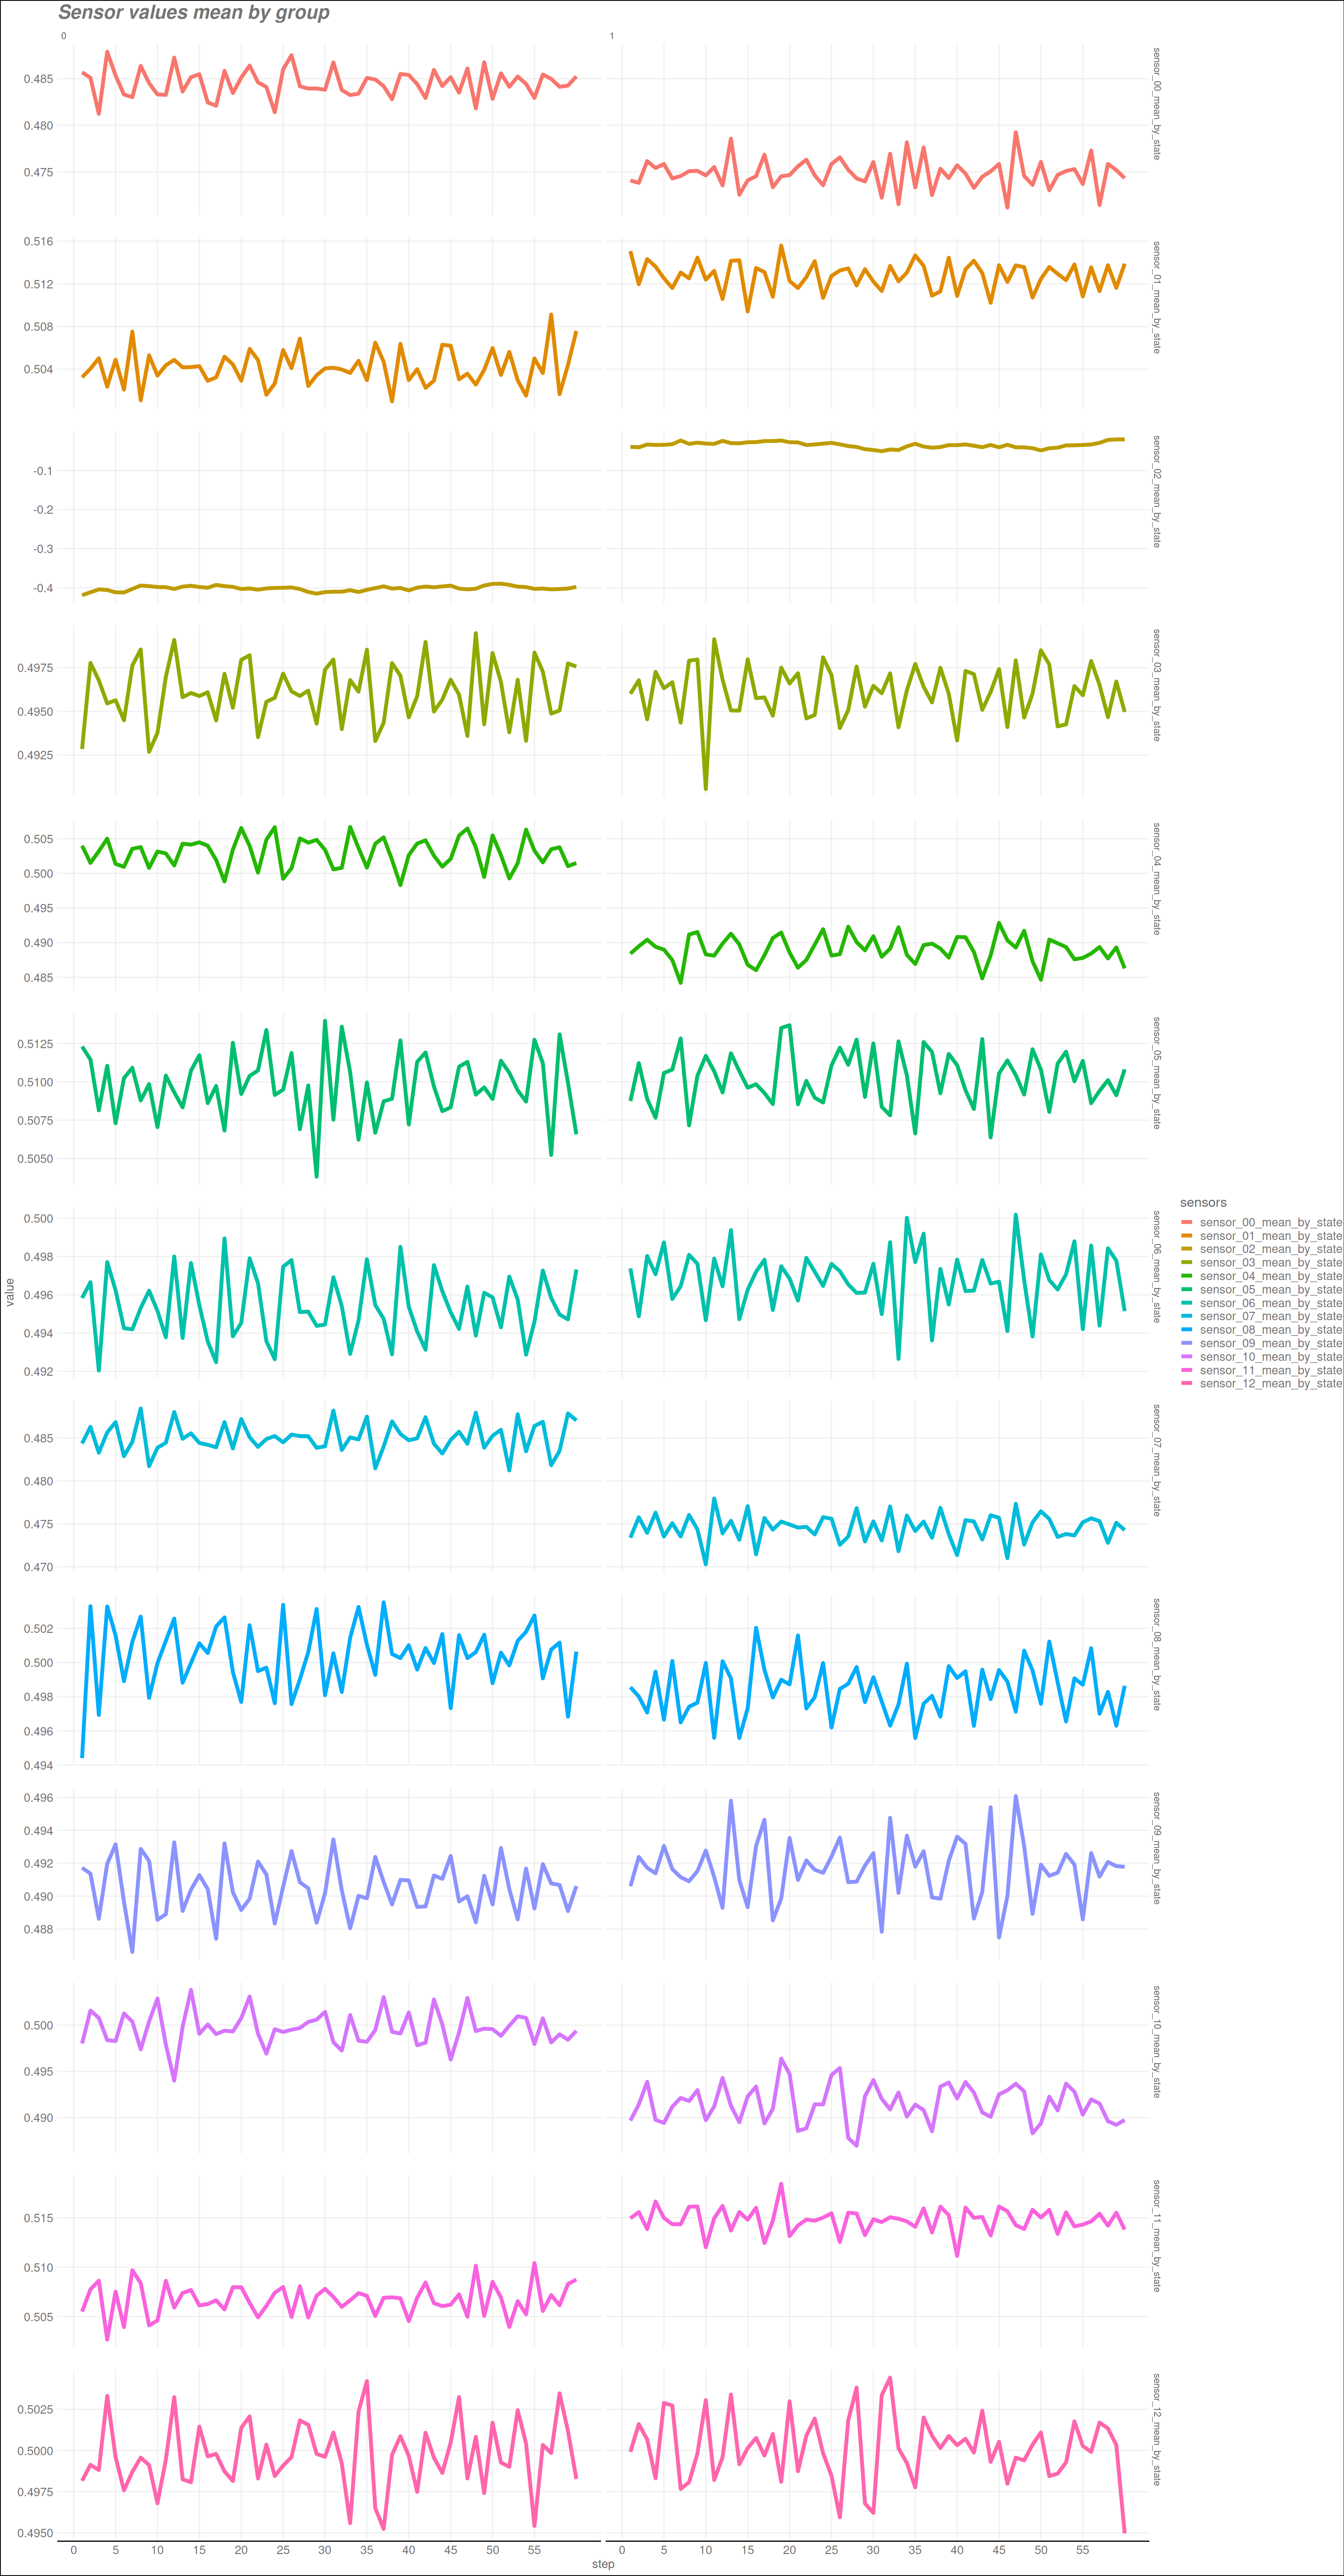

In [12]:
facet_plotter(df_sensors_ungrouped, grouped = FALSE)
facet_plotter(df_sensors_grouped, grouped = TRUE)

#Removing data frames
rm(df_sensors_ungrouped, df_sensors_grouped)
gc()

In [13]:
df_sensors_ungrouped_var <- create_stats(df_sensors, stat = var, c(4:16), step_based = TRUE, state_group = FALSE)
df_sensors_grouped_var <- create_stats(df_sensors, stat = var, c(4:16), step_based = TRUE, state_group = TRUE)

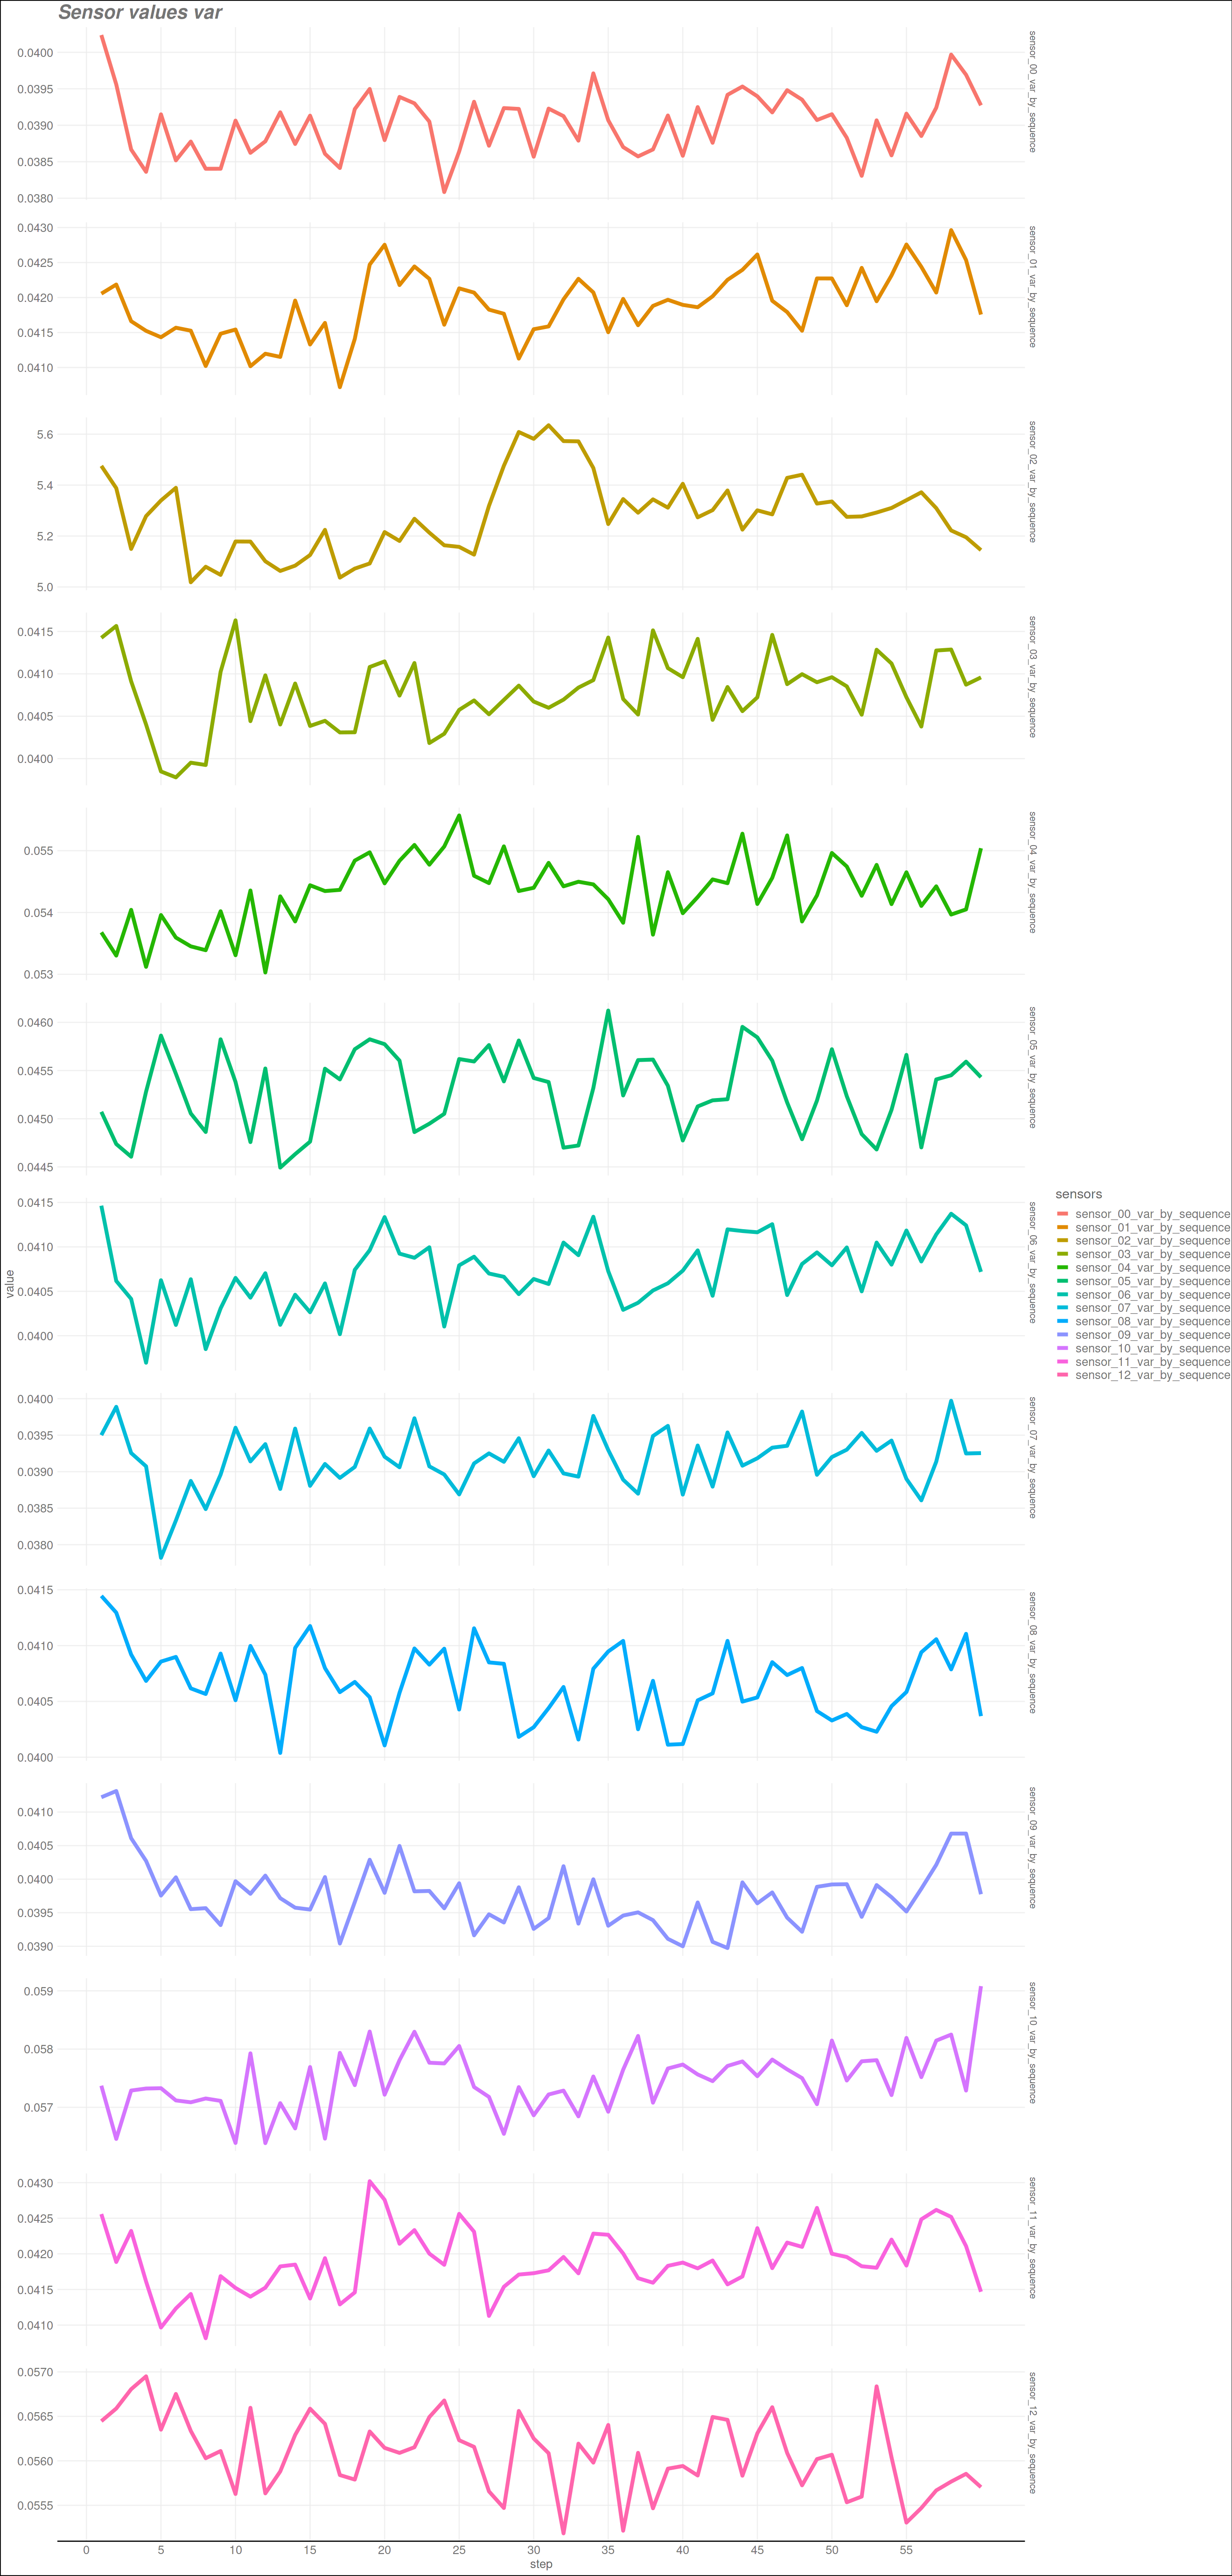

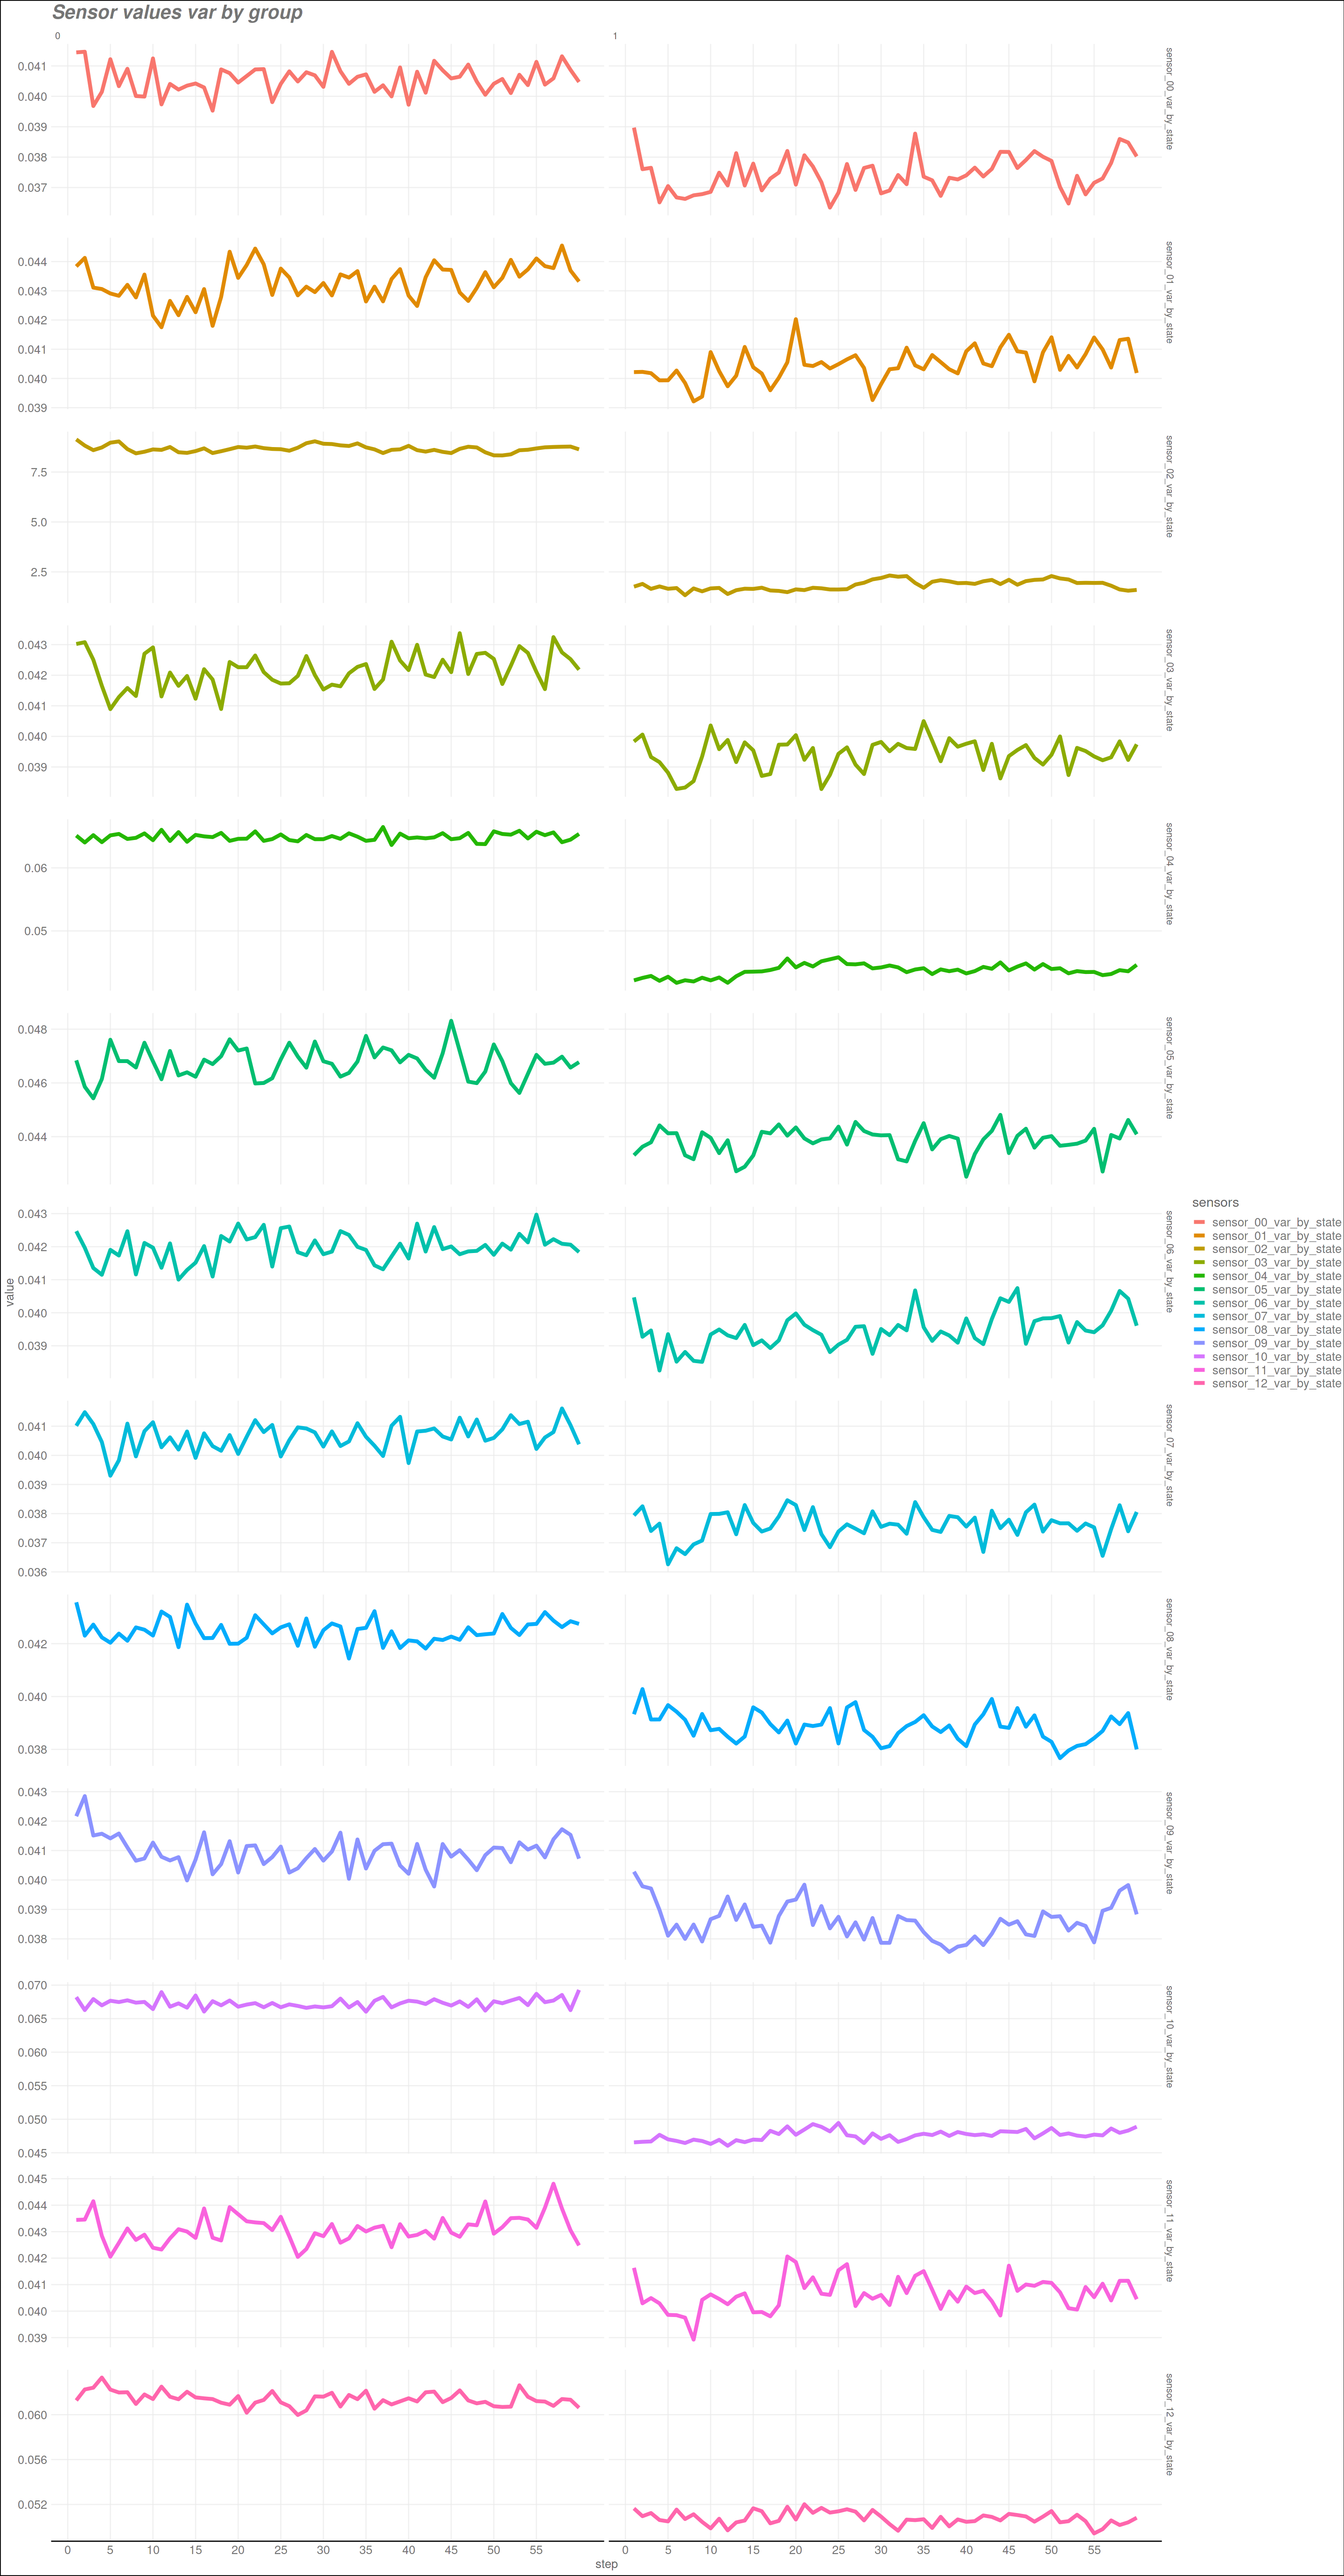

In [14]:
facet_plotter(df_sensors_ungrouped_var, grouped = FALSE)
facet_plotter(df_sensors_grouped_var, grouped = TRUE)

#Removing data frames
rm(df_sensors_ungrouped_var, df_sensors_grouped_var)

**Mean**

For ungrouped (overall) mean of sensors only 'sensor_02' stands out with its apparent trend / lack of noise. Since it changes values infrequently (it drops and stays low in steps 25-59, another method of measurement will be, in addition, put in place.

The second plot is far more interesting - there are visible differences in mean among sensors differentiated by group.

Sensors 00, 01, 02, 04, 07, 10, 11 have vastly different overall means. This observation should help while building trees. Sensor02 for group 0 also drops in steps 30-59.

**Variance**

The differences between groups are more apparent when it comes to variance comparison. Each '0' state has a higher variance than a '1' state.

# Growing trees - function setup

**Grid search function**

Grid search function is based on sequences and subjects and not on random rows.

In [15]:
#dataset = data.frame object, model_type = h2o4gpu classifier model, params = list of parameters*, return_n = how many observations should be returned
#k - number of folds; if NULL, k = 10, which_fold - setting a seed to check on the same fold; if NULL, last fold is chosen
#params = depending on model type - list of n parameter arrays, custom_holdout - testing on a given holdout, instead of a k split
h2o4gpu_grid_search <- function(dataset, model_type, params, return_n, k = NULL, which_fold = NULL, custom_holdout = NULL) {

#Dataset split
if(missing(k) || (is.null(k))) {
    k_grid <- 10
} else if(!missing(k))
        k_grid <- k



if(missing(which_fold) || (is.null(which_fold))) {
sampled_k <- k_grid 
} else if(!missing(which_fold))
        sampled_k <- which_fold




if(missing(custom_holdout) ||(is.null(custom_holdout))) {
sampled_subjects <- sample(unique(dataset$subject), floor(length(unique(dataset$subject))/k_grid) + length(unique(dataset$subject)) %%k_grid)

holdout_rows <- which(dataset$subject %in% sampled_subjects)
}
    

if(!missing(custom_holdout)) {
holdout_rows <- c((nrow(dataset)+1):(nrow(dataset)+nrow(custom_holdout))) #Datasets are bound and holdout rows are assumed to be bound rows
    dataset <- dataset %>%
    rbind(custom_holdout)
}
    


if(model_type == 'rf') {
    
df_grid <- data.frame(n_estimators = 0, max_depth = 0, colsample_bytree = 0, subsample = 0, AUC = 0) 
    

        rf_n_estimators <- params[[1]]
        rf_max_depth <- params[[2]]
        rf_colsample_bytree <- params[[3]]
        rf_subsample <- params[[4]]
    
#Brute grid search loops
for(i in rf_n_estimators){
  for(j in rf_max_depth){
    for(k in rf_colsample_bytree){
      for(l in rf_subsample){
        
    rf_model_class <- h2o4gpu.random_forest_classifier(n_estimators = i, criterion = "entropy",
    max_depth = j, colsample_bytree = k,
    subsample = l, random_state = 1212, max_features = "auto",
    verbose = 0, tree_method = "gpu_hist",
    predictor = "gpu_predictor", backend = "h2o4gpu") %>% fit(dataset[-holdout_rows, -length(dataset)], dataset[-holdout_rows, length(dataset)])

        
        df_grid <- df_grid %>%
          rbind(c(i,j,k,l, AUC(predictions = predict(rf_model_class,
                                  dataset[holdout_rows, -length(dataset)], type = "prob")[, 2],
                                  labels = dataset[holdout_rows, length(dataset)])))
        
                          }
                        }
                      }
                    }
    
    
    
        df_grid <- df_grid %>%
        arrange(desc(AUC)) %>%
        head(return_n)     
    

}     else if(model_type == 'gb') {

df_grid <- data.frame(learning_rate = 0, n_estimators = 0, max_depth = 0, colsample_bytree = 0, subsample = 0, AUC = 0) 
    

        gb_learning_rate <- params[[1]]
        gb_n_estimators <- params[[2]]
        gb_max_depth <- params[[3]]
        gb_colsample_bytree <- params[[4]]
        gb_subsample <- params[[5]]

    
#Brute grid search loops
for(i in gb_learning_rate) {
    for(j in gb_n_estimators) {
      for(k in gb_max_depth) {
        for(l in gb_colsample_bytree){
          for(n in gb_subsample) {
        
    gb_model_class <- h2o4gpu.gradient_boosting_classifier(loss = "deviance", learning_rate = i,
                n_estimators = j, subsample = n, criterion = "friedman_mse",
                min_weight_fraction_leaf = 0, max_depth = k, min_impurity_decrease = 0,random_state = 1212,
                max_features = "auto", verbose = 0,
                warm_start = FALSE, presort = "auto", colsample_bytree = l,
                tree_method = "gpu_hist", 
                predictor = "gpu_predictor", objective = "binary:logistic",
                booster = "gbtree", gamma = 0, colsample_bylevel = 1, reg_alpha = 0,
                reg_lambda = 1, scale_pos_weight = 1, base_score = 0.5,
                backend = "h2o4gpu") %>% fit(dataset[-holdout_rows, -length(dataset)], dataset[-holdout_rows, length(dataset)])
              
        df_grid <- df_grid %>%
          rbind(c(i,j,k,l, n, AUC(predictions = predict(gb_model_class,
                                  dataset[holdout_rows, -length(dataset)], type = "prob")[, 2],
                                  labels = dataset[holdout_rows, length(dataset)])))
        
                                  }
                                 }
                                }
                               }
                              }

    df_grid <- df_grid %>%
        arrange(desc(AUC)) %>%
        head(return_n)
}

return(df_grid)
}

# Growing trees - model building

In [16]:
#Transforming variables into factors
df_train <- df_train %>%
    mutate(across(c(1:3, 17), as.factor))

**Feature evaluator**

**Creating a subset for evaluation**

The data frame needs to be split up for model validation. The problem that arises is the need to separate by unique subjects (*StratifiedGroupKFold* from sklearn package crosses the mind, although there's still an issue of imbalanced classes). Subject groups have considerably different sizes:

|  Subject group's head   | Subject group's tail     |
| --- | --- | 
|  120   | 7500    |
|  300   | 7740    |
|  360   | 8640    |
|  420   | 9480    |
|  420   | 10500   |
|  420   | 11940   |


A successful partitioning of data is similar to a [Knapsack Problem](https://en.wikipedia.org/wiki/Knapsack_problem). The optimization of sample size and group separation, whilst maintaining a balance between classes is possible. There's an easier and a little bit messier solution. I sampled subjects using different random states and waited for a good enough size, class balance and akin differences in gropued means (as visible on plots above).

In [17]:
#Function for changing data frames - most of statistics used were previously found to be significant by AMBROSM

df_changer <- function(df, is_test = NULL) {

    
#Sum of variance and mean (grouped by sequence) that were higher than overall average

    df <- create_stats(df, stat = var, which_col = c(4:16), step_based = FALSE) #Generating variance grouped by sequence
    overall_var <- colVars(df[, 4:16])

    df <- create_stats(df, stat = mean, which_col = c(4:16), step_based = FALSE) #Generating mean grouped by sequence
    overall_mean <- colMeans(df[, 4:16])


if(missing(is_test) || is_test == FALSE) {

    #Return positives / negatives
    df[, 18:30] <- df[, 18:30] - overall_var #Subtracting sequence grouped variance from step grouped variance
    df[, 31:43] <- df[, 31:43] - overall_mean #Subtracting sequence grouped mean from step grouped mean
    

    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 18:30, function(x){sum(x>0)}) %>%
        mutate_at(.vars = 31:43, function(x){sum(x>0)}) %>%
        ungroup()


#Max / min of difference (thanks to AMBROSM)
    df <- create_stats(df, stat = lag, which_col = c(4:16), step_based = FALSE) #Generating lag grouped by sequence

 
    df[, 44:56] <- df[, 4:16] - df[, 44:56] #Finding the difference
    df[is.na(df)] <- 0   
    
    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 44:56, .funs = list(highest = ~max(.))) %>%
        ungroup()

    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 44:56, .funs = list(lowest = ~min(.))) %>%
        ungroup()         

    
    #Removing non min/max difference
    df <- df %>%
        dplyr::select(-c(44:56))

#Calculating kurtosis
    df <- create_stats(df, stat = kurtosis, which_col = c(4:16), step_based = FALSE)
    df[is.na(df)] <- 0

#Adding subject count
    df <- df %>%
        group_by(subject) %>%
        mutate(sum_of_subjects = n()) %>%
        ungroup()

    
#Removing variables             
        df <- df %>%
            dplyr::select(-c(4:16,step,subject, state), state)
                                                  

} else if(!missing(is_test) && is_test == TRUE) {
    
      #Return positives / negatives
    df[, 17:29] <- df[, 17:29] - overall_var #Subtracting sequence grouped variance from step grouped variance
    df[, 30:42] <- df[, 30:42] - overall_mean #Subtracting sequence grouped mean from step grouped mean
    

    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 17:29, function(x){sum(x>0)}) %>%
        mutate_at(.vars = 30:42, function(x){sum(x>0)}) %>%
        ungroup()


#Max / min of difference (thanks to AMBROSM)
    df <- create_stats(df, stat = lag, which_col = c(4:16), step_based = FALSE) #Generating lag grouped by sequence

 
    df[, 43:55] <- df[, 4:16] - df[, 43:55] #Finding the difference
    df[is.na(df)] <- 0   
    
    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 43:55, .funs = list(highest = ~max(.))) %>%
        ungroup()

    df <- df %>%
        group_by(sequence) %>%
        mutate_at(.vars = 43:55, .funs = list(lowest = ~min(.))) %>%
        ungroup()         

    
    #Removing non min/max difference
    df <- df %>%
        dplyr::select(-c(43:55))

#Calculating kurtosis
    df <- create_stats(df, stat = kurtosis, which_col = c(4:16), step_based = FALSE)
    df[is.na(df)] <- 0

#Adding subject count
    df <- df %>%
        group_by(subject) %>%
        mutate(sum_of_subjects = n()) %>%
        ungroup()

    
#Removing variables             
        df <- df %>%
            dplyr::select(-c(4:16,step,subject))
    
}

#'Eliminating' steps - dividing the whole data frame by 60
df <- df %>%
    distinct()

    return(df)
}

Feature evaluation is more or less a copy of [AMBROSM'S](https://www.kaggle.com/code/ambrosm/tpsapr22-best-model-without-nn/notebook#Feature-selection) idea, vaguely 'translated' to R (didn't implement reverse feature evaluation but it shouldn't be a problem). I'm using a separate holdout set because some of the used statistics are based on on overall data (calculating statistics and then separating data could cause unexpected leakage).

In [18]:
evaluate_feats <- function(dataset, model_type) {

improvement <- 1

#Sampling once more (0.2 sample)
set.seed(4)
    sampled_subjects <- sample(unique(dataset$subject), floor(length(unique(dataset$subject))/5) + length(unique(dataset$subject)) %%5)

holdout_rows <- which(dataset$subject %in% sampled_subjects)

holdout_dataset <- dataset[holdout_rows, ]
dataset <- dataset[-holdout_rows, ]


#Adding statistics to both datasets   
dataset <- df_changer(dataset)
holdout_dataset <- df_changer(holdout_dataset)


#Evaluating features
feature_cols <- c(1:(length(dataset)-1))
selected_cols <- c()

if(model_type == 'gb') {
    gb_params <- list(c(0.05), c(200), c(3), c(0.75),c(1))

loop_counter <- 0
last_model_auc <- 0
#Creating a while loop that checks for model improvement
while(improvement > 0) { 
    loop_counter <- loop_counter+1

    auc_df <- data.frame(var_name = 'blank', added_var = as.numeric(0)) 
    
    tic()
    for(i in feature_cols) {
        if(loop_counter <=1) {
            add_auc <- last_model_auc -  h2o4gpu_grid_search(dataset[, c(i, length(dataset))], 'gb', gb_params, return_n = 1, custom_holdout = holdout_dataset[, c(i,length(dataset))])[1,6]
      } else if(loop_counter >=2){

            add_auc <- last_model_auc -  h2o4gpu_grid_search(dataset[, c(selected_cols,i,length(dataset))], 'gb', gb_params, return_n = 1, custom_holdout = holdout_dataset[, c(selected_cols,i,length(dataset))])[1,6]
                           }

        auc_df <- auc_df %>%
            rbind(c(colnames(dataset)[i], add_auc))
}

    auc_df <- auc_df[-1, ]  #Removing bespoke empty row
    auc_df[, 2] <- as.numeric(auc_df[, 2])
    
    selected_cols <- append(which(auc_df$added_var == min(auc_df$added_var)), selected_cols) #Adding best performing feature to the vector
    

    improvement <- min(auc_df$added_var)*(-1) #If the expanded model is better, added_var will be negative, hence the *(-1)
    last_model_auc <- last_model_auc + improvement


    cat(sprintf("Variable added: %s\n", auc_df[which(auc_df$added_var == min(auc_df$added_var)), 1]))
    cat(sprintf("AUC improvement: %s\n", improvement))
    cat(sprintf("New AUC: %s\n", last_model_auc))
    flush.console() 
    toc()
                                            }
                 }

if(model_type == 'rf') {

rf_params <- list(c(300), c(3), c(0.75),c(1))

loop_counter <- 0
last_model_auc <- 0
#Creating a while loop that checks for model improvement
    

while(improvement > 0) { 
    loop_counter <- loop_counter+1

    auc_df <- data.frame(var_name = 'blank', added_var = as.numeric(0)) 
    
    tic()
    for(i in feature_cols) {
        if(loop_counter <=1) {
            add_auc <- last_model_auc -  h2o4gpu_grid_search(dataset[, c(i, length(dataset))], 'rf', rf_params, return_n = 1, custom_holdout = holdout_dataset[, c(i,length(dataset))])[1,5]
      } else if(loop_counter >=2){

            add_auc <- last_model_auc -  h2o4gpu_grid_search(dataset[, c(selected_cols,i,length(dataset))], 'rf', rf_params, return_n = 1, custom_holdout = holdout_dataset[, c(selected_cols,i,length(dataset))])[1,5]
                           }

        auc_df <- auc_df %>%
            rbind(c(colnames(dataset)[i], add_auc))
}

    auc_df <- auc_df[-1, ]  #Removing bespoke empty row
    auc_df[, 2] <- as.numeric(auc_df[, 2])
    
    selected_cols <- append(which(auc_df$added_var == min(auc_df$added_var)), selected_cols) #Adding best performing feature to the vector
    

    improvement <- min(auc_df$added_var)*(-1) #If the expanded model is better, added_var will be negative, hence the *(-1)
    last_model_auc <- last_model_auc + improvement


    cat(sprintf("Variable added: %s\n", auc_df[which(auc_df$added_var == min(auc_df$added_var)), 1]))
    cat(sprintf("AUC improvement: %s\n", improvement))
    cat(sprintf("New AUC: %s\n", last_model_auc))
    flush.console() 
    toc()
                                            }
                 }
                                            }


In [19]:
#Evaluating features using gb trees
evaluate_feats(df_train, model_type = 'gb')

Variable added: sensor_02_lag_by_sequence_highest
AUC improvement: 0.784488027104338
New AUC: 0.784488027104338
24.312 sec elapsed
Variable added: sum_of_subjects
AUC improvement: 0.0701564668985963
New AUC: 0.854644494002934
20.425 sec elapsed
Variable added: sensor_04_kurtosis_by_sequence
AUC improvement: 0.0397645284570968
New AUC: 0.894409022460031
21.049 sec elapsed
Variable added: sensor_02_lag_by_sequence_lowest
AUC improvement: 0.0197125640706605
New AUC: 0.914121586530692
20.756 sec elapsed
Variable added: sensor_04_lag_by_sequence_lowest
AUC improvement: 0.003642350304352
New AUC: 0.917763936835044
20.544 sec elapsed
Variable added: sensor_12_kurtosis_by_sequence
AUC improvement: 0.00199601661012583
New AUC: 0.919759953445169
21.578 sec elapsed
Variable added: sensor_02_var_by_sequence
AUC improvement: 0.00100240448917666
New AUC: 0.920762357934346
21.417 sec elapsed
Variable added: sensor_07_kurtosis_by_sequence
AUC improvement: 0.00071292694212588
New AUC: 0.921475284876472

In [20]:
#Evaluating features using random forests
evaluate_feats(df_train, model_type = 'rf')

Variable added: sensor_02_lag_by_sequence_highest
AUC improvement: 0.77278456537014
New AUC: 0.77278456537014
29.001 sec elapsed
Variable added: sum_of_subjects
AUC improvement: 0.0771215872758041
New AUC: 0.849906152645944
25.936 sec elapsed
Variable added: sensor_04_kurtosis_by_sequence
AUC improvement: 0.0289255502495022
New AUC: 0.878831702895446
26.409 sec elapsed
Variable added: sensor_02_lag_by_sequence_lowest
AUC improvement: 0.0128697172210452
New AUC: 0.891701420116491
26.514 sec elapsed
Variable added: sensor_03_var_by_sequence
AUC improvement: 0.00342418035382563
New AUC: 0.895125600470317
25.784 sec elapsed
Variable added: sensor_08_kurtosis_by_sequence
AUC improvement: 0.00131989839598867
New AUC: 0.896445498866306
27.332 sec elapsed
Variable added: sequence
AUC improvement: -0.000696534391199211
New AUC: 0.895748964475107
27.214 sec elapsed


# Making predictions

In [21]:
#Loading in test data
    df_test <- read.csv("../input/tabular-playground-series-apr-2022/test.csv")

#Normalizing columns grouped by sequence
    df_test<- df_test %>%
        group_by(sequence) %>%
        mutate_at(c(4:5,7:16), BBmisc::normalize, method = 'range', range = c(0,1)) %>%
        ungroup()

#Changing variables to factors 
    df_test <- df_test %>%
        mutate(across(c(1:3), as.factor))

#Augmenting train and test data
    df_train <- df_changer(df_train)
    df_test <- df_changer(df_test, is_test = TRUE)

#Chosen features vector
chosen_gb_cols <- c(30,67,58,43,45,66,4,61,64,53)
chosen_rf_cols <- c(30, 67, 58, 43, 5, 62)


#Creating and fitting tree models
    gb_model <- h2o4gpu.gradient_boosting_classifier(loss = "deviance", learning_rate = 0.05,
                n_estimators = 200, subsample = 1, criterion = "friedman_mse",
                min_samples_split = 2, min_samples_leaf = 1,
                min_weight_fraction_leaf = 0, max_depth = 3, min_impurity_decrease = 0,random_state = 1077,
                max_features = "auto", verbose = 0,
                warm_start = FALSE, presort = "auto", colsample_bytree = 0.75,
                tree_method = "gpu_hist", 
                predictor = "gpu_predictor", objective = "binary:logistic",
                booster = "gbtree", gamma = 0, colsample_bylevel = 1, reg_alpha = 0,
                reg_lambda = 1, scale_pos_weight = 1, base_score = 0.5,
                backend = "h2o4gpu") %>% fit(df_train[, chosen_gb_cols], df_train[, length(df_train)])



    rf_model <- h2o4gpu.random_forest_classifier(n_estimators = 300, criterion = "entropy",
                max_depth = 3, min_samples_split = 3, min_samples_leaf = 2, colsample_bytree = 0.75,
                subsample = 1, random_state = 1077, max_features = "auto",
                verbose = 0, tree_method = "gpu_hist",
                predictor = "gpu_predictor", backend = "h2o4gpu") %>% fit(df_train[, chosen_rf_cols], df_train[, length(df_train)])



#Creating predictions
    rf_predictions <- predict(gb_model, df_test[, chosen_gb_cols], type = "prob")[ ,2]

    gb_predictions <- predict(rf_model, df_test[, chosen_rf_cols], type = "prob")[, 2]

In [25]:
#Loading in the submission file
state_submission <- read.csv("../input/tabular-playground-series-apr-2022/sample_submission.csv")

final_results <- 10*gb_predictions+rf_predictions

state_submission$state <- final_results

write.csv(state_submission, "./state_test.csv", quote = FALSE, row.names = FALSE)